# Recreating Roelof's PPA Model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import nengo

seed = 18945
np.random.seed(18945)

STEP_SIZE = 25   # duration time step in ms
N_STEPs = 80     # 2000 ms in total
N_CONCEPTs = 5   
N_LEMMAs = 5     
N_MORPHEMEs = 5  
N_PHONEMEs = 10   
N_SYLLABLEs = 5  

N_lesion_values = 100 # for 100 for weight lesion, 66 (!) for decay lesion

N_GROUPs = 4 # Normal, Nonfluent_agrammatic, Semantic_dementia, Logopenic
NORMAL = 0
NONFLUENT_AGRAMMATIC = 1
SEMANTIC_DEMENTIA = 2
LOGOPENIC = 3

N_TASKs = 3 # Naming, Comprehension, Repetition
NAMING = 0
COMPREHENSION = 1
REPETITION = 2

N_ASSESSMENTs = 6
ENGLISH = 0
DUTCH = 1
BRAMBATI_T1 = 2 # baseline 
BRAMBATI_T2 = 3 # follow up 
ROHRERMANDELLI_T1 = 4 # baseline 
ROHRERMANDELLI_T2 = 5 # follow up 

Y = 1.0     # connection present 
N = 0.0     # connection absent

# labeling network nodes
CAT = 0
DOG = 1
MAT = 2
FOG = 3
FISH = 4

pK = 0 # phonemes
pE = 1
pT = 2
pD = 3
pO = 4
pG = 5
pM = 6
pF = 7
pI = 8
pS = 9

Cat = 0
Dog = 1
Mat = 2
Fog = 3
Fish = 4

# connections conceptual network [N_CONCEPTs][N_CONCEPTs]
CC_con =  np.array([
    # CAT   DOG  MAT  FOG  FISH  
    [   N,    Y,   N,   N,    Y ], # CAT
    [   Y,    N,   N,   N,    Y ], # DOG
    [   N,    N,   N,   N,    N ], # MAT
    [   N,    N,   N,   N,    N ], # FOG
    [   Y,    Y,   N,   N,    N ]  # FISH
])

# connections between concept and lemma nodes [N_CONCEPTs][N_LEMMAs]
CL_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between lemma nodes and morpheme nodes [N_LEMMAs][N_MORPHEMEs]
LM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between morpheme nodes and output phoneme nodes [N_MORPHEMEs][N_PHONEMEs]
MP_con = np.array([
     #  K  E  T  D  O  G  M  F  I  S  
    [   Y, Y, Y, N, N, N, N, N, N, N ], # <cat>
    [   N, N, N, Y, Y, Y, N, N, N, N ], # <dog>
    [   N, Y, Y, N, N, N, Y, N, N, N ], # <mat>
    [   N, N, N, N, Y, Y, N, Y, N, N ], # <fog>
    [   N, N, N, N, N, N, N, Y, Y, Y ]  # <fish>
])

# connections between output phoneme nodes and syllable program nodes [N_PHONEMEs][N_SYLLABLEs]
PS_con = np.array([
    # Cat Dog  Mat Fog  Fish
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input and output phoneme nodes [N_PHONEMEs][N_PHONEMEs]
PP_con = np.array([
    # K    E    T   D    O    G   M   F   I  S 
    [ Y,   N,   N,  N,   N,   N,  N,  N,  N, N  ], # K
    [ N,   Y,   N,  N,   N,   N,  N,  N,  N, N  ], # E
    [ N,   N,   Y,  N,   N,   N,  N,  N,  N, N  ], # T
    [ N,   N,   N,  Y,   N,   N,  N,  N,  N, N  ], # D
    [ N,   N,   N,  N,   Y,   N,  N,  N,  N, N  ], # O
    [ N,   N,   N,  N,   N,   Y,  N,  N,  N, N  ], # G
    [ N,   N,   N,  N,   N,   N,  Y,  N,  N, N  ], # M
    [ N,   N,   N,  N,   N,   N,  N,  Y,  N, N  ], # F
    [ N,   N,   N,  N,   N,   N,  N,  N,  Y, N  ], # I
    [ N,   N,   N,  N,   N,   N,  N,  N,  N, Y  ]  # S
])

# connections between input phoneme nodes and input morpheme nodes [N_PHONEMEs][N_MORPHEMEs]
PiM_con = np.array([
    # Cat Dog  Mat Fog  Fish 
    [ Y,   N,   N,  N,   N ], # K
    [ Y,   N,   Y,  N,   N ], # E
    [ Y,   N,   Y,  N,   N ], # T
    [ N,   Y,   N,  N,   N ], # D
    [ N,   Y,   N,  Y,   N ], # O
    [ N,   Y,   N,  Y,   N ], # G
    [ N,   N,   Y,  N,   N ], # M
    [ N,   N,   N,  Y,   Y ], # F
    [ N,   N,   N,  N,   Y ], # I
    [ N,   N,   N,  N,   Y ]  # S
])

# connections between input morpheme and output morpheme nodes [N_MORPHEMEs][N_MORPHEMEs]
iMM_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])

# connections between input morpheme and lemma nodes [N_MORPHEMEs][N_LEMMAs]
iML_con = np.array([
    [ Y,  N,  N,  N,  N ],
    [ N,  Y,  N,  N,  N ],
    [ N,  N,  Y,  N,  N ],
    [ N,  N,  N,  Y,  N ],
    [ N,  N,  N,  N,  Y ]
])



In [2]:
# English data on PPA for single word tasks: Savage et al. (2013) [N_GROUPs][N_TASKs]
REAL_DATA_ENGLISH = np.array([
    # Naming  Comprehension Repetition
    [ 88.7,      97.0,      99.7 ], # Control
    [ 78.3,      94.3,      79.7 ], # nfvPPA
    [ 22.7,      63.3,      95.3 ], # svPPA
    [ 41.3,      84.7,      84.7 ]  # lvPPA
])

# Dutch data on PPA for single word tasks: Janssen et al. (2021) [N_GROUPs][N_TASKs]
REAL_DATA_DUTCH = np.array([
    # Naming  Comprehension Repetition */
    [ 90.3,      96.3,      96.7 ], # Control
    [ 77.3,      97.7,      89.3 ], # nfvPPA
    [ 29.0,      78.0,      96.3 ], # svPPA
    [ 66.3,      93.7,      91.3 ]  # lvPPA
])

# Brambati T1 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 85.3,      99.7,      83.7 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA
    [ 69.3,      95.0,      69.0 ]  # lvPPA
])

# Brambati T2 data on PPA for single word tasks: Brambati et al. (2015) [N_GROUPs][N_TASKs]
REAL_DATA_BRAMBATI_T2 = np.array([
    # Naming  Comprehension Repetition
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 83.3,      94.8,      68.0 ], # nfvPPA
    [ 19.3,      66.7,      82.3 ], # svPPA
    [ 52.7,      95.0,      58.8 ]  # lvPPA
])

# Rohrer et al. (2013), logopenic patients (N=21), T1 baseline and T2 one year later
# Mandelli et al. (2016), nonfluent/agrammatic patients (N=34), T1 baseline and T2 one year later

# RohrerMandelli T1 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T1 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 76.7,      99.0,      81.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 61.0,      94.0,      94.0 ]  # lvPPA
])

# RohrerMandelli T2 data on PPA: Rohrer et al. (2013), Mandelli et al. (2016) [N_GROUPs][N_TASKs]
REAL_DATA_ROHRERMANDELLI_T2 = np.array([
    # Naming  Comprehension Repetition 
    [ 90.3,      96.3,      96.7 ], # Control (dummy, from Savage)
    [ 66.0,      90.0,      65.5 ], # nfvPPA
    [ 26.7,      88.0,      90.6 ], # svPPA (dummy, from Brambati)
    [ 43.0,      85.0,      77.0 ]  # lvPPA
])



In [3]:
# parameter values
CYCLE_TIME = 25                 # ms per link 
SEM_rate = 0.0101 * STEP_SIZE   # prop per step_size ms 
LEM_rate = 0.0074 * STEP_SIZE   # prop per step_size ms 
LEX_rate = 0.0120 * STEP_SIZE   # prop per step_size ms 
DECAY_rate = 0.0240 * STEP_SIZE # prop per step_size ms 
EXTIN = 0.1965 * STEP_SIZE      # act_units per step_size ms 
LEMLEXFRAC = 0.3 
# fraction of LEX_rate spread between lemmas and output morphemes 
# implementing weak cascading of activation, see Roelofs (2008, JEP:LMC) 

FR = 0.10  # fraction of connection weight for input phoneme to input morpheme, cf. Roelofs (1997, Cognition)
SEGMENT_DURATION = 125  # ms
PICTURE_DURATION = 125  # ms

# set here to simulate weight or decay lesion and what to print 
WEIGHT_LESION = 1
DECAY_LESION = 0

SHOW_RESULTS_ALL_VALUES = 0 # set here whether to print all values 



In [4]:
# nengo settings

N_NEURONS = 100 # num neurons in a pop
DIM = 1 # dimensions
T = 0.08 # 80 ms for now b/c old model uses 80 steps of 25 ms for 2000 ms in total, but step is 1 ms in nengo
CYCLE_TIME_NENGO = 0.025 # was 25 ms per link 
PICTURE_DURATION_NENGO = 0.0125 # was 125 ms
SEGMENT_DURATION_NENGO = 0.0125
tau = 0.001


### Model Definition

In [5]:
class Model:
    def __init__(
        self,
        CC_con = CC_con,
        CL_con = CL_con,
        LM_con = LM_con,
        MP_con = MP_con,
        PS_con = PS_con,
        PP_con = PP_con,
        PiM_con = PiM_con,
        iMM_con = iMM_con,
        iML_con = iML_con,
    ):
        
        self.CC_con = CC_con
        self.CL_con = CL_con
        self.LM_con = LM_con
        self.MP_con = MP_con
        self.PS_con = PS_con
        self.PP_con = PP_con
        self.PiM_con = PiM_con
        self.iMM_con = iMM_con
        self.iML_con = iML_con
        
        self.REAL_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)
        
        self.WEIGHT_value = np.zeros(N_lesion_values)
        self.DECAY_value = np.zeros(N_lesion_values)
        
        # concept and lemma
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        # output form 
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        # input form 
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)

        # input buffer for nodes 
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        # Aphasia parameters

        # weight lesion 
        self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 0.0 # connections to/from output phonemes 
        self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 0.0 # connections to/within/from conceptual network
        self.CONNECTION_DECREASE_LOGOPENIC = 0.0 # connections to/from lexical output forms, and b/w input/output phonemes
        
        # decay lesion
        self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 0.0 # output phonemes 
        self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 0.0 # concepts
        self.DECAY_INCREASE_LOGOPENIC = 0.0 # lexical output forms
        
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target concept, cat
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of conceptual relative, dog
        self.ACT_CR= np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target lemma, cat
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of lemma relative, i.e., semantically related, dog
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        # Activation of target syllable, cat
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        # Activation of syllabic relative, mat
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
        # T = target, R = relative
        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        
        
    def test(self):
        print('hi')
        
    
    def get_input_C(self):
        # conceptual inputs for naming task
        #ext_input_C = lambda t: 1000*self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXTIN*t if t < CYCLE_TIME_NENGO else (1000*(self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXTIN*t + EXTIN*(t - CYCLE_TIME_NENGO)) if t < PICTURE_DURATION else (1000*EXTIN*(t - CYCLE_TIME_NENGO) if t < (CYCLE_TIME_NENGO + PICTURE_DURATION_NENGO) else 0.0))
        ext_input_C = lambda t: self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXTIN if t < CYCLE_TIME_NENGO else ((self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA*EXTIN + EXTIN) if t < PICTURE_DURATION else (EXTIN if t < (CYCLE_TIME_NENGO + PICTURE_DURATION_NENGO) else 0.0))
        
        return ext_input_C
    

    def get_input_iP(self):
        # phonetic inputs for comprehension and repetition tasks 
        ext_input_iP_pK = lambda t: 1000*EXTIN*t if t < SEGMENT_DURATION_NENGO else 0.0
        ext_input_iP_pE = lambda t: 0.0 if t < SEGMENT_DURATION_NENGO else (1000*EXTIN*t if t < 2*SEGMENT_DURATION_NENGO else 0.0)
        ext_input_iP_pT = lambda t: 0.0 if t < 2*SEGMENT_DURATION_NENGO else (1000*EXTIN*t if t < 3*SEGMENT_DURATION_NENGO else 0.0) 
        
        return ext_input_iP_pK, ext_input_iP_pE, ext_input_iP_pT
        
        
    def create_nengo_model_C(self):
        model = nengo.Network(seed = seed)
        input_func = self.get_input_C()
        
        with model:
            print('Creating nengo model....')
            
            # CC_con
            
            # create concept ensembles
            C_cat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_dog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_mat_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_fog_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            C_fish_ens = nengo.Ensemble(n_neurons=N_NEURONS, dimensions=DIM, neuron_type=nengo.Direct())
            
            # connection from input
            Bp = tau
            nd_input = nengo.Node(input_func) # input
            nengo.Connection(nd_input, C_cat_ens, synapse=tau, transform=Bp)
            
            # connections b/w concepts
            
            # self.C_node_act = self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)) + self.input_C
            A = 1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)
            Ap = tau*A + 1
            
            nengo.Connection(C_cat_ens, C_cat_ens, synapse=tau, transform=Ap)
            nengo.Connection(C_dog_ens, C_dog_ens, synapse=tau, transform=Ap)
            nengo.Connection(C_mat_ens, C_mat_ens, synapse=tau, transform=Ap)
            nengo.Connection(C_fog_ens, C_fog_ens, synapse=tau, transform=Ap)
            nengo.Connection(C_fish_ens, C_fish_ens, synapse=tau, transform=Ap)
            
            # self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))
            CC_con_func = lambda x: SEM_rate * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA * x
            nengo.Connection(C_cat_ens, C_dog_ens, synapse=tau, function=CC_con_func)
            nengo.Connection(C_dog_ens, C_cat_ens, synapse=tau, function=CC_con_func)
            nengo.Connection(C_cat_ens, C_fish_ens, synapse=tau, function=CC_con_func)
            nengo.Connection(C_fish_ens, C_cat_ens, synapse=tau, function=CC_con_func)
            nengo.Connection(C_dog_ens, C_fish_ens, synapse=tau, function=CC_con_func)
            nengo.Connection(C_fish_ens, C_dog_ens, synapse=tau, function=CC_con_func)
            
            # probes
            probe_in = nengo.Probe(nd_input)
            probe = nengo.Probe(C_cat_ens)
            
        with nengo.Simulator(model) as sim:
            print('Running model...')
            sim.run(T)
            t = sim.trange()
            x = sim.data[probe_in]
            x_hat = sim.data[probe]
            print('Finished.')
            
        return t, x, x_hat
        
        
    def plot_activation(self):
        plt.figure()
        
        # N_lesion_values, N_STEPs, N_GROUPs, N_TASKs
        # NORMAL = 0, NONFLUENT_AGRAMMATIC = 1, SEMANTIC_DEMENTIA = 2, LOGOPENIC = 3
        # NAMING = 0, COMPREHENSION = 1, REPETITION = 2
        for i in range(N_lesion_values):
            plt.plot(self.ACT_C[i, :, 0, 0], label=f'{i}')
            
        #plt.legend()
        plt.title('Roelof')
        plt.show()
        
        
    def plot_activation_nengo(self):
        t, x, x_hat = self.create_nengo_model_C()
        
        input_r = np.zeros(N_CONCEPTs)
        input_t = np.zeros(N_STEPs)
        for T in range(N_STEPs):
            # picture input
            if (T >= 0 and T < PICTURE_DURATION):
                input_r += self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA * EXTIN

            # enhancement
            if ((T >= CYCLE_TIME) and  (T < (CYCLE_TIME + PICTURE_DURATION))):
                input_r[CAT] += EXTIN
                
            input_t[T] = input_r[CAT]
        
        plt.figure()
        plt.plot(t, x, label='Input')
        #plt.plot(t, input_t, label='Input R')
        plt.plot(t, x_hat, label='Output')
        plt.legend()
        plt.title('Roelof')
        plt.show()
    
    
    def set_real_data_matrix(self, assessment):
        if assessment == ENGLISH:
            self.REAL_DATA = REAL_DATA_ENGLISH
        elif assessment == DUTCH:
            self.REAL_DATA = REAL_DATA_DUTCH
        elif assessment == BRAMBATI_T1:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T1
        elif assessment == BRAMBATI_T2:
            self.REAL_DATA = REAL_DATA_BRAMBATI_T2
        elif assessment == ROHRERMANDELLI_T1:
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T1
        elif (assessment == ROHRERMANDELLI_T2):
            self.REAL_DATA = REAL_DATA_ROHRERMANDELLI_T2
                    
                    
    def set_spreading_rates(self):
        self.ACT_C = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_S = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_CR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LT = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_LR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_ST = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))
        self.ACT_SR = np.zeros(shape=(N_lesion_values, N_STEPs, N_GROUPs, N_TASKs))

        self.CC_con *= SEM_rate
        self.CL_con *= LEM_rate
        self.LM_con *= LEX_rate
        self.MP_con *= LEX_rate
        self.PS_con *= LEX_rate

        # connections for input phonemes to output phonemes, input morphemes, input morphemes to lemmas

        self.PP_con *= LEX_rate
        self.PiM_con *= (FR * LEX_rate)
        self.iMM_con *= LEX_rate
        self.iML_con *= LEX_rate
        
        
    def reset_network(self):
        self.C_node_act = np.zeros(N_CONCEPTs)
        self.L_node_act = np.zeros(N_LEMMAs)
        self.M_node_act = np.zeros(N_MORPHEMEs)
        self.iM_node_act = np.zeros(N_MORPHEMEs)
        self.iP_node_act = np.zeros(N_PHONEMEs)
        self.oP_node_act = np.zeros(N_PHONEMEs)
        self.S_node_act = np.zeros(N_SYLLABLEs)
        
        
    def set_aphasic_parameters(self, group, lesion_value):
        WEIGHT_FACTOR, DECAY_FACTOR = 0.0, 0.0

        if WEIGHT_LESION:
            WEIGHT_FACTOR = self.WEIGHT_value[lesion_value]  
        else:
            WEIGHT_FACTOR = 1.0

        if DECAY_LESION:
            DECAY_FACTOR = self.DECAY_value[lesion_value]   
        else:
            DECAY_FACTOR = 1.0


        # setting of weight parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal 

        if group == SEMANTIC_DEMENTIA:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.CONNECTION_DECREASE_LOGOPENIC = WEIGHT_FACTOR
        else:
            self.CONNECTION_DECREASE_LOGOPENIC = 1.0 # normal

        # setting of decay parameters

        if group == NONFLUENT_AGRAMMATIC:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC = 1.0 # normal

        if group == SEMANTIC_DEMENTIA:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_SEMANTIC_DEMENTIA = 1.0 # normal

        if group == LOGOPENIC:
            self.DECAY_INCREASE_LOGOPENIC = DECAY_FACTOR
        else:
            self.DECAY_INCREASE_LOGOPENIC = 1.0 # normal
            
        
    # NETWORK UPDATING ROUTINES 

    def update_network(self, task, T):
        self.set_input_to_zero()
        self.get_external_input(task, T)
        self.get_internal_input()
        self.update_activation_of_nodes()
        
        
    def set_input_to_zero(self):
        self.input_C = np.zeros(N_CONCEPTs)
        self.input_L = np.zeros(N_LEMMAs)
        self.input_M = np.zeros(N_MORPHEMEs)
        self.input_iM = np.zeros(N_MORPHEMEs)
        self.input_iP = np.zeros(N_PHONEMEs)
        self.input_oP = np.zeros(N_PHONEMEs)
        self.input_S = np.zeros(N_SYLLABLEs)
        
        
    def get_external_input(self, task, T):
        if task == NAMING:
            # picture input
            if (T >= 0 and T < PICTURE_DURATION):
                self.input_C[CAT] += self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA * EXTIN

            # enhancement
            if ((T >= (CYCLE_TIME)) and  (T < (CYCLE_TIME + PICTURE_DURATION))):
                self.input_C[CAT] += EXTIN

        if (task == COMPREHENSION or task == REPETITION): 

            # spoken word input
            if ((0 <= T) and (T < SEGMENT_DURATION)):
                self.input_iP[pK] += EXTIN

            if ((SEGMENT_DURATION <= T) and (T < (2 * SEGMENT_DURATION))):
                self.input_iP[pE] += EXTIN


            if ((2 * SEGMENT_DURATION <= T) and (T < (3 * SEGMENT_DURATION))): 
                self.input_iP[pT] += EXTIN
                
                
    def get_internal_input(self):
        # input activation for concept nodes

        for i in range(N_CONCEPTs):
            for j in range(N_CONCEPTs):
                self.input_C[i] += (self.C_node_act[j] * (self.CC_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA))

        for i in range(N_CONCEPTs):
            for j in range(N_LEMMAs):
                self.input_C[i] += (self.L_node_act[j] * self.CL_con[j][i] * self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)

        # input activation for lemma nodes
        for i in range(N_LEMMAs):
            for j in range(N_CONCEPTs):
                self.input_L[i] += (self.C_node_act[j] * self.CL_con[j][i] *  self.CONNECTION_DECREASE_SEMANTIC_DEMENTIA)

        for i in range(N_LEMMAs):
            for j in range(N_MORPHEMEs):                 
                self.input_L[i] += (self.iM_node_act[j] * self.iML_con[j][i])

        # input activation for output morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_LEMMAs):
                self.input_M[i] += (self.L_node_act[j] * LEMLEXFRAC * self.LM_con[j][i] 
                                    * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_MORPHEMEs):
            for j in range(N_MORPHEMEs):
                self.input_M[i] += (self.iM_node_act[j] * self.iMM_con[j][i] * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for output phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_MORPHEMEs):
                self.input_oP[i] += (self.M_node_act[j] * self.MP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_oP[i] += (self.iP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for syllable program nodes
        for i in range(N_SYLLABLEs):
            for j in range(N_PHONEMEs):
                self.input_S[i] += (self.oP_node_act[j] * self.PS_con[j][i] 
                                    * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC)

        # input activation for input phoneme nodes
        for i in range(N_PHONEMEs):
            for j in range(N_PHONEMEs):
                self.input_iP[i] += (self.oP_node_act[j] * self.PP_con[j][i] 
                                     * self.CONNECTION_DECREASE_NONFLUENT_AGRAMMATIC * self.CONNECTION_DECREASE_LOGOPENIC)

        # input activation for input morpheme nodes
        for i in range(N_MORPHEMEs):
            for j in range(N_PHONEMEs):
                self.input_iM[i] += (self.iP_node_act[j] * self.PiM_con[j][i])
                
                
    def update_activation_of_nodes(self):
        self.C_node_act = self.C_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_SEMANTIC_DEMENTIA)) + self.input_C
        self.L_node_act = self.L_node_act * (1.0 - DECAY_rate) + self.input_L
        self.M_node_act = self.M_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_LOGOPENIC)) + self.input_M
        self.oP_node_act = self.oP_node_act * (1.0 - (DECAY_rate * self.DECAY_INCREASE_NONFLUENT_AGRAMMATIC)) + self.input_oP
        self.iP_node_act = self.iP_node_act * (1.0 - DECAY_rate) + self.input_iP
        self.iM_node_act = self.iM_node_act * (1.0 - DECAY_rate) + self.input_iM
        self.S_node_act = self.S_node_act * (1.0 - DECAY_rate) + self.input_S
            
    
    def determine_activation_critical_nodes(self, lesion_value, step, group, task):
        self.ACT_C[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_S[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_CT[lesion_value][step][group][task] = self.C_node_act[CAT]
        self.ACT_CR[lesion_value][step][group][task] = self.C_node_act[DOG]
        self.ACT_LT[lesion_value][step][group][task] = self.L_node_act[CAT]
        self.ACT_LR[lesion_value][step][group][task] = self.L_node_act[DOG]
        self.ACT_ST[lesion_value][step][group][task] = self.S_node_act[CAT]
        self.ACT_SR[lesion_value][step][group][task] = self.S_node_act[MAT]
        
        
    def compute_activation_results(self):
        self.TOTAL_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_C = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_S = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_CR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LT = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_LR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        self.TOTAL_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.TOTAL_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_ST = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))
        self.MEAN_ACT_SR = np.zeros(shape=(N_lesion_values, N_GROUPs, N_TASKs))

        for lesion_value in range(N_lesion_values):
            for group in range(N_GROUPs):
                for task in range(N_TASKs): 
                    for i in range(N_STEPs): 
                        self.TOTAL_ACT_C[lesion_value][group][task] += self.ACT_C[lesion_value][i][group][task]
                        self.TOTAL_ACT_S[lesion_value][group][task] += self.ACT_S[lesion_value][i][group][task]
                        self.TOTAL_ACT_CT[lesion_value][group][task] += self.ACT_CT[lesion_value][i][group][task]
                        self.TOTAL_ACT_CR[lesion_value][group][task] += self.ACT_CR[lesion_value][i][group][task]
                        self.TOTAL_ACT_LT[lesion_value][group][task] += self.ACT_LT[lesion_value][i][group][task]
                        self.TOTAL_ACT_LR[lesion_value][group][task] += self.ACT_LR[lesion_value][i][group][task]
                        self.TOTAL_ACT_ST[lesion_value][group][task] += self.ACT_ST[lesion_value][i][group][task]
                        self.TOTAL_ACT_SR[lesion_value][group][task] += self.ACT_SR[lesion_value][i][group][task]

                    self.MEAN_ACT_C[lesion_value][group][task] = (self.TOTAL_ACT_C[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_S[lesion_value][group][task] = (self.TOTAL_ACT_S[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CT[lesion_value][group][task] = (self.TOTAL_ACT_CT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_CR[lesion_value][group][task] = (self.TOTAL_ACT_CR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LT[lesion_value][group][task] = (self.TOTAL_ACT_LT[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_LR[lesion_value][group][task] = (self.TOTAL_ACT_LR[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_ST[lesion_value][group][task] = (self.TOTAL_ACT_ST[lesion_value][group][task] / N_STEPs)
                    self.MEAN_ACT_SR[lesion_value][group][task] = (self.TOTAL_ACT_SR[lesion_value][group][task] / N_STEPs)
                    
                    
    # FITS AND PRINTING

    def print_heading(self):
        print("\n")
        print("WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs\n")
        print("Simulation of group studies \n")
        
        
    def print_parameters(self):
        print("Parameter values:\n")
        print(f"cycle time : {CYCLE_TIME : 6d} [ms]\n")
        print(f"sem_rate   : {SEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"lem_rate   : {LEM_rate/STEP_SIZE : .4f} [prop/ms]\n")
        print(f"exin       : {EXTIN/STEP_SIZE : .4f} [act_units/ms]\n")
        print(f"d          : {DECAY_rate/STEP_SIZE : .4f} [prop/ms]\n")
        
        
    def compute_fits_and_print_results_on_screen(self, assessment):
        LV = 0.0 # lesion value

        self.SIM_DATA = np.zeros(shape=(N_GROUPs, N_TASKs))
        self.GOODNESS_OF_FIT = np.zeros(N_lesion_values)

        if assessment == ENGLISH:
            print("\nAssessment is Savage et al. (2013), English\n")
        if assessment == DUTCH:
            print("\nAssessment is Janssen et al. (2022), Dutch\n")
        if assessment == BRAMBATI_T1:
            print("\nAssessment is Brambati et al. (2015), baseline T1\n")
        if assessment == BRAMBATI_T2:
            print("\nAssessment is Brambati et al. (2015), follow up T2\n")
        if assessment == ROHRERMANDELLI_T1:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
        if assessment == ROHRERMANDELLI_T2:
            print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")


        for group in range(N_GROUPs): 
            print(" \n")

            if group == NORMAL:
                print("NORMAL \n")
            elif group == NONFLUENT_AGRAMMATIC:
                print("NONFLUENT/AGRAMMATIC \n")
            elif group == SEMANTIC_DEMENTIA:
                print("SEMANTIC DEMENTIA  \n")
            elif group == LOGOPENIC:
                print("LOGOPENIC  \n")

            if assessment == ENGLISH:
                print("\nSavage et al. (2013), English\n")
            if assessment == DUTCH:
                print("\nAssessment is Janssen et al. (2022), Dutch\n")
            if assessment == BRAMBATI_T1:
                print("\nAssessment is Brambati et al. (2015), baseline T1\n")
            if assessment == BRAMBATI_T2:
                print("\nAssessment is Brambati et al. (2015), follow up T2\n")
            if assessment == ROHRERMANDELLI_T1:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), baseline T1\n")
            if assessment == ROHRERMANDELLI_T2:
                print("\nAssessment is Rohrer et al. (2013) and Mandelli et al. (2016), follow up T2\n")

            print("        Naming   Comprehension  Repetition \n")
            print(f"Real:   {self.REAL_DATA[group][NAMING] : 5.2f}         {self.REAL_DATA[group][COMPREHENSION] : 5.2f}        {self.REAL_DATA[group][REPETITION] : 5.2f} \n")
            print("Lesion:                                    MAE\n")


            for lesion_value in range(N_lesion_values): 

                self.SIM_DATA[group][NAMING] = (self.MEAN_ACT_ST[lesion_value][group][NAMING] - self.MEAN_ACT_SR[lesion_value][group][NAMING]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][NAMING] - self.MEAN_ACT_SR[lesion_value][NORMAL][NAMING]) * 100.0

                self.SIM_DATA[group][COMPREHENSION] = (self.MEAN_ACT_CT[lesion_value][group][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][group][COMPREHENSION]) / (self.MEAN_ACT_CT[lesion_value][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[lesion_value][NORMAL][COMPREHENSION]) * 100.0

                self.SIM_DATA[group][REPETITION] = (self.MEAN_ACT_ST[lesion_value][group][REPETITION] - self.MEAN_ACT_SR[lesion_value][group][REPETITION]) / (self.MEAN_ACT_ST[lesion_value][NORMAL][REPETITION] - self.MEAN_ACT_SR[lesion_value][NORMAL][REPETITION]) * 100.0

                if group == NORMAL:
                    LV = 1.0
                elif WEIGHT_LESION:
                    LV = self.WEIGHT_value[lesion_value]
                elif DECAY_LESION:
                    LV = self.DECAY_value[lesion_value]

                self.GOODNESS_OF_FIT[lesion_value] = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING])
                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION])
                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION]) ) / 3.0

                if SHOW_RESULTS_ALL_VALUES: # toggle for printing the results for all lesion values 
                    sim_combined = (abs(self.REAL_DATA[group][NAMING] - self.SIM_DATA[group][NAMING]) 
                                    + abs(self.REAL_DATA[group][COMPREHENSION] - self.SIM_DATA[group][COMPREHENSION]) 
                                    + abs(self.REAL_DATA[group][REPETITION] - self.SIM_DATA[group][REPETITION])) / 3.0
                    
                    print(f"{LV : 5.2f}   {self.SIM_DATA[group][NAMING] : 5.2f}        {self.SIM_DATA[group][COMPREHENSION] : 5.2f}        {self.SIM_DATA[group][REPETITION] : 5.2f}     {sim_combined : 5.2f}\n")

            a = 0
            for i in range(N_lesion_values):
                if self.GOODNESS_OF_FIT[a] > self.GOODNESS_OF_FIT[i]:
                    a = i


            if WEIGHT_LESION:
                print(f"Best fit weight value = {self.WEIGHT_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")
            if DECAY_LESION:
                print(f"Best fit decay value = {self.DECAY_value[a] : .2f}   MAE = {self.GOODNESS_OF_FIT[a] : .2f}\n")

            sim_naming = (self.MEAN_ACT_ST[a][group][NAMING] - self.MEAN_ACT_SR[a][group][NAMING]) / (self.MEAN_ACT_ST[a][NORMAL][NAMING] - self.MEAN_ACT_SR[a][NORMAL][NAMING]) * 100.0
            sim_comprehension = (self.MEAN_ACT_CT[a][group][COMPREHENSION] - self.MEAN_ACT_CR[a][group][COMPREHENSION]) / (self.MEAN_ACT_CT[a][NORMAL][COMPREHENSION] - self.MEAN_ACT_CR[a][NORMAL][COMPREHENSION]) * 100.0
            sim_repetition = (self.MEAN_ACT_ST[a][group][REPETITION] - self.MEAN_ACT_SR[a][group][REPETITION]) / (self.MEAN_ACT_ST[a][NORMAL][REPETITION] - self.MEAN_ACT_SR[a][NORMAL][REPETITION]) * 100.0
                
            print(f"Sim:   {sim_naming : 5.2f}         {sim_comprehension : 5.2f}        {sim_repetition : 5.2f} \n")


    # MAIN ROUTINES 

    def main(self):
        ls = 0.0 # exact lesion value 

        self.print_heading()
        self.print_parameters()
        self.set_spreading_rates()

        if WEIGHT_LESION:
            ls = 0.0
            for lesion_value in range(N_lesion_values):
                # values between maximally damaged, 0.0, and minimally damaged, 0.99
                self.WEIGHT_value[lesion_value] = ls 
                ls += 0.01

        if DECAY_LESION:
             # values between minimally damaged, 1.01, and maximally damaged, i.e., full decay, 1.66
            ls = 1.01
            for lesion_value in range(N_lesion_values):
                self.DECAY_value[lesion_value] = ls
                ls += 0.01


        for assessment in range(N_ASSESSMENTs):

            self.set_real_data_matrix(assessment)

            for group in range(N_GROUPs):

                for task in range(N_TASKs): 

                    for lesion_value in range(N_lesion_values): 

                        self.reset_network()
                        self.set_aphasic_parameters(group, lesion_value)

                        T = 0 # time in ms
                        step = 0
                        while T < (N_STEPs * STEP_SIZE):

                            self.update_network(task, T)
                            self.determine_activation_critical_nodes(lesion_value, step, group, task)

                            T += STEP_SIZE
                            step += 1
                            
                        if assessment == 0 and group == 0 and task == 0 and lesion_value == 0:
                            self.plot_activation_nengo()
                            

            # MAPPING TO HUMAN DATA
            self.compute_activation_results()
            #self.compute_fits_and_print_results_on_screen(assessment)
            self.plot_activation()
            input()

        return 0
        
        

### Run the model:



WEAVER++/ARC model simulation of primary progressive aphasia (c) Ardi Roelofs

Simulation of group studies 

Parameter values:

cycle time :     25 [ms]

sem_rate   :  0.0101 [prop/ms]

lem_rate   :  0.0074 [prop/ms]

exin       :  0.1965 [act_units/ms]

d          :  0.0240 [prop/ms]

Creating nengo model....


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Running model...


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Finished.


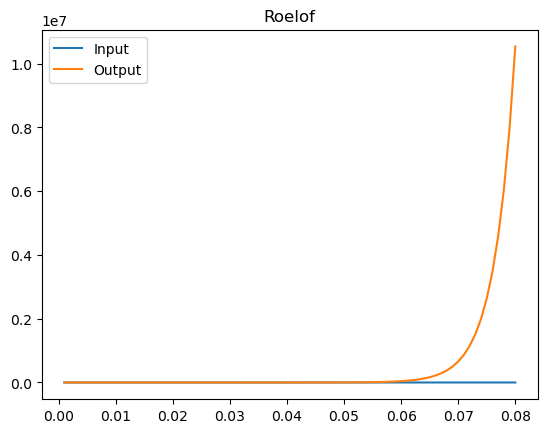

KeyboardInterrupt: 

In [6]:
m = Model()
m.main()

In [ ]:
"""
WANT TO SET UP TO PLOT ACTIVATIONS AT EACH STEP, KNOW INPUT AND PLOT DYNAMICS
REPLICATE ONE SET OF NODES GIVEN SAME INPUTS, AND MAP OUTPUTS
DO ONE POPULATIONS AT A TIME, DON'T REPLICATE EVERYTHING THEM DEBUG
FIRST POPULATION SHOULD HAVE INPUT FROM OUTSIDE WORLD
set tau to 0.001, implement meet again tmr at 5 
"""  